<a href="https://colab.research.google.com/github/Mfosoriov/QA-Course-JavaPOO/blob/main/Modelos_de_Clasificaci%C3%B3n_compra_de_Bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#Para esta actividad se importarán las siguientes librerías:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [70]:
from google.colab import files

In [71]:
uploaded = files.upload()


Saving datos_actividad2.xlsx to datos_actividad2 (5).xlsx


In [79]:
df = pd.read_excel('datos_actividad2 (5).xlsx')

# Ver las primeras filas
df.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,BikeBuyer
0,Wollongong,New South Wales,Australia,Bachelors,Clerical,M,M,1,3,0,1,81916,50.97,1
1,Shawnee,British Columbia,Canada,Partial College,Clerical,M,M,1,2,1,2,81076,53.11,1
2,West Covina,California,United States,Bachelors,Clerical,F,S,0,3,0,0,86387,54.08,1
3,Liverpool,England,United Kingdom,Partial College,Skilled Manual,M,M,1,2,1,2,61481,56.93,1
4,Werne,Nordrhein-Westfalen,Germany,Partial College,Skilled Manual,M,S,1,1,0,0,51804,55.41,1


In [80]:
# prompt: usar label encoding para las primeras 7 columnas

from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar Label Encoding a las primeras 7 columnas
for i in range(7):
  df.iloc[:, i] = le.fit_transform(df.iloc[:, i])

# Ver las primeras filas después de aplicar Label Encoding
df.head()


,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,BikeBuyer
0,263,27,0,0,0,1,0,1,3,0,1,81916,50.97,1
1,227,5,1,3,0,1,0,1,2,1,2,81076,53.11,1
2,259,6,5,0,0,0,1,0,3,0,0,86387,54.08,1
3,146,8,4,3,4,1,0,1,2,1,2,61481,56.93,1
4,258,30,3,3,4,1,1,1,1,0,0,51804,55.41,1


In [105]:
# prompt: ver frecuencia de Bike Buyer

df['BikeBuyer'].value_counts()


,count
BikeBuyer,
1,10127
0,8228


BikeBuyer               1.000000
NumberChildrenAtHome    0.359822
AvgMonthSpend           0.280320
YearlyIncome            0.249518
HomeOwnerFlag           0.229102
TotalChildren           0.209628
NumberCarsOwned         0.185420
Gender                  0.116172
CountryRegionName       0.014821
StateProvinceName      -0.000250
City                   -0.009855
Occupation             -0.056252
Education              -0.111465
MaritalStatus          -0.189319
Name: BikeBuyer, dtype: float64


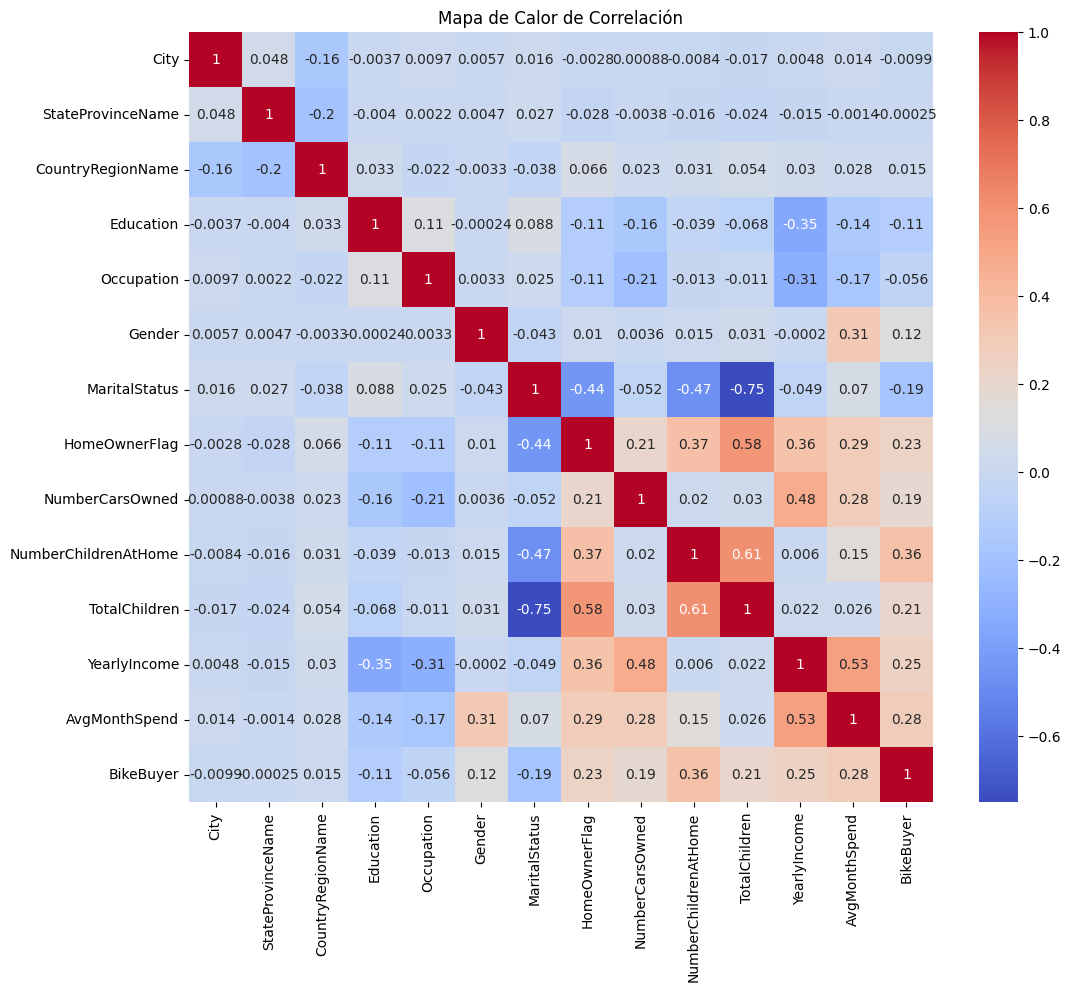

In [81]:
# prompt: evaluar la relación de las variables respecto a la columna BikeBuyer

# Calcular la correlación entre las variables y 'Bike Buyer'
correlation = df.corr()['BikeBuyer'].sort_values(ascending=False)

# Mostrar la correlación
print(correlation)

# Visualizar la correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [85]:
# prompt: quitar las primeras tes columnas

df = df.drop(df.columns[:3], axis=1)


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18355 entries, 0 to 18354
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             18355 non-null  object 
 1   Occupation            18355 non-null  object 
 2   Gender                18355 non-null  object 
 3   MaritalStatus         18355 non-null  object 
 4   HomeOwnerFlag         18355 non-null  int64  
 5   NumberCarsOwned       18355 non-null  int64  
 6   NumberChildrenAtHome  18355 non-null  int64  
 7   TotalChildren         18355 non-null  int64  
 8   YearlyIncome          18355 non-null  int64  
 9   AvgMonthSpend         18355 non-null  float64
 10  BikeBuyer             18355 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.5+ MB


# **División del dataset en datos de entrenamiento y datos de test**

In [87]:
# la última columna (variable destino) la guardamos en y
y = df.iloc [:,10].values
# las primeras columnas (atributos de entrada) las guardamos en x
x = df.iloc[:,:-1].values

In [195]:
# separamos en conjunto de prueba y entrenamiento con la función train_test_split()
# Se decidió usar un 70% de datos para entrenar el algoritmo y un 30% de los datos para hacer los test de predicción, teniendo en cuenta las ideas clave de la guia 3, en donde se menciona que "es tipico utilizar 2/3 de los datos disponibles para el entrenamiento y 1/3 de los datos disponibles para la validación. También teniendo en cuenta que así se implementa en plataformas como AWS-Machine Learning.
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3, random_state=42)

## **Ajuste de los modelos de clasificación propuestos**

In [196]:
#Código de ajuste del modelo de clasificación 1

# entrenamos un algoritmo de árbol de desición (CART)
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(criterion = "gini" , max_depth = 7)
arbol.fit(x_train,y_train)

# obtenemos una exactitud de 0,79 con los datos de entrenamiento
print("Exactitud del conjunto de entrenamiento: {:.2f}".format(arbol.score(x_train, y_train)))

Exactitud del conjunto de entrenamiento: 0.80


In [197]:
#Código de ajuste del modelo de clasificación 2

# entrenamos un algoritmo de random forest
from sklearn.ensemble import RandomForestClassifier
bosque = RandomForestClassifier(random_state = 17, max_depth = 7, n_estimators = 20)
bosque.fit(x_train,y_train)

# obtenemos una exactitud de 0,83 con los datos de entrenamiento
print("Exactitud del conjunto de entrenamiento: {:.2f}".format(bosque.score(x_train, y_train)))

Exactitud del conjunto de entrenamiento: 0.79


# **Evaluación de cada modelo**

In [198]:
#Código para mostrar la evaluación del modelo de clasificación 1
print("Exactitud sobre conjunto de prueba: {:.2f}".format(arbol.score(x_validation, y_validation)))

Exactitud sobre conjunto de prueba: 0.78


In [199]:
# Realizamos predicciones con el dataset de validación
y_pred=arbol.predict(x_validation)
y_pred

# imprimimos la matriz de confusión
from sklearn.metrics import confusion_matrix
Matriz_de_confusion1 = confusion_matrix(y_validation, y_pred)
print("Matriz de Confusión Árbol de Decisión:")
Matriz_de_confusion1

Matriz de Confusión Árbol de Decisión:


array([[1823,  729],
       [ 469, 2486]])

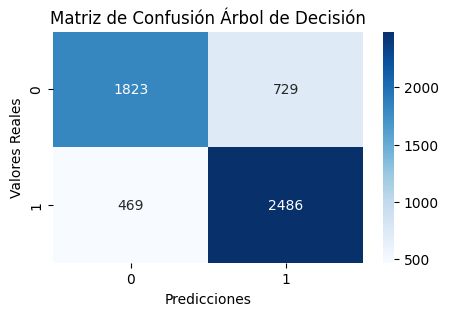

In [200]:
# Imprimimos la matriz de confusión con un mapa de calor
plt.figure(figsize=(5, 3))
sns.heatmap(Matriz_de_confusion1, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión Árbol de Decisión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


In [201]:
#Código  para mostrarla evaluación del modelo de clasificación 2
print("Exactitud sobre conjunto de prueba: {:.2f}".format(bosque.score(x_validation, y_validation)))

Exactitud sobre conjunto de prueba: 0.78


In [202]:
# Realizamos predicciones con el dataset de validación
y_pred2=bosque.predict(x_validation)
y_pred2

# imprimimos la matriz de confusión
from sklearn.metrics import confusion_matrix
Matriz_de_confusion2 = confusion_matrix(y_validation, y_pred2)
print("Matriz de Confusión Random Forest:")
Matriz_de_confusion2

Matriz de Confusión Random Forest:


array([[1842,  710],
       [ 522, 2433]])

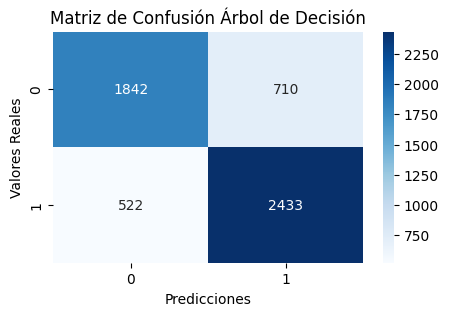

In [204]:
# Imprimimos la matriz de confusión con un mapa de calor
plt.figure(figsize=(5, 3))
sns.heatmap(Matriz_de_confusion2, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión Árbol de Decisión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


In [205]:
# Importando la liberia metrics de sklearn, imprimimos un reporte que nos permite ver la precisión, la recuperación y la puntuación F1, de forma detallada para cada clase y la exactitud general del modelo.
from sklearn.metrics import classification_report
print("Desempeño del Modelo 1: Árbol de Decisión")
print(classification_report(y_validation, y_pred))

Desempeño del Modelo 1: Árbol de Decisión
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2552
           1       0.77      0.84      0.81      2955

    accuracy                           0.78      5507
   macro avg       0.78      0.78      0.78      5507
weighted avg       0.78      0.78      0.78      5507



In [206]:
#Importando la liberia metrics de sklearn, imprimimos un reporte que nos permite ver la precisión, la recuperación y la puntuación F1, de forma detallada para cada clase y la exactitud general del modelo.
print("Desempeño del Modelo 2: Random Forest")
print(classification_report(y_validation, y_pred2))

Desempeño del Modelo 2: Random Forest
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      2552
           1       0.77      0.82      0.80      2955

    accuracy                           0.78      5507
   macro avg       0.78      0.77      0.77      5507
weighted avg       0.78      0.78      0.78      5507



Arból de Decisión 0.7721065830721003 <built-in method std of numpy.ndarray object at 0x7cdc241930f0>
Random Forest 0.7722943408678435 <built-in method std of numpy.ndarray object at 0x7cdc24192a90>


<function matplotlib.pyplot.show(close=None, block=None)>

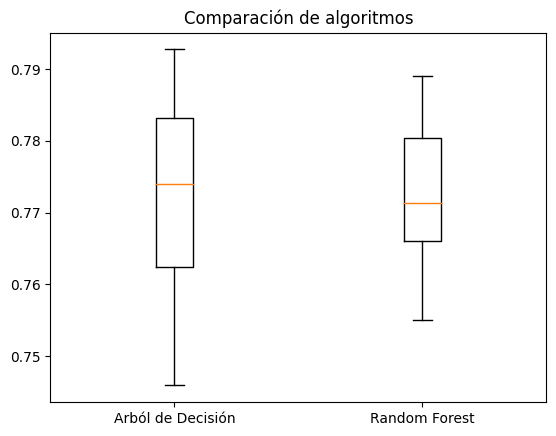

In [208]:
#Para comparar el desempeño de los dos modelos, utilizamos la validación cruzada con el metodo K-fold, dividiendo los datos en 10 subconjuntos
from sklearn.model_selection import cross_val_score
models=[]
models.append(("Arból de Decisión", arbol))
models.append(("Random Forest", bosque))

results=[]
names=[]

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True )
    cv_results = cross_val_score(model, x_validation, y_validation, cv=kfold, scoring ="accuracy")
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(), cv_results.std)

plt.boxplot(results, labels=names)
plt.title("Comparación de algoritmos")
plt.show
